
# Modeling linearly separable problems using Single Layer Perceptron in TENSORFLOW

> `Universal Approximation Theorem:` a neural network with a single hidden layer containing a finite number of neurons can approximate any continuous function, given that the activation function is non-linear

SINGLE LAYER PERCEPTRON  doesn't have a hidden layer, only has one layer of input nodes that are fully connected to the output node. 

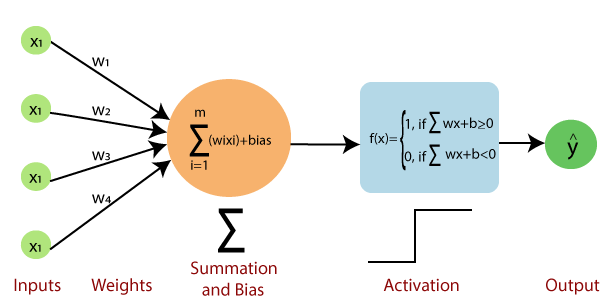

Here, The output node calculates the weighted sum of the input values and applies an activation function to produce the output.

In [ ]:
# Importing Dependencies (modules/libraries)

import tensorflow as tf
import keras as ks
import numpy as np 
import sklearn.preprocessing

### What is a Model?
acts as a mathematical function which takes input features and returns a target variable value/output label
> remember, a model is problem specific and different for every distict ml problem,

### What do we mean by Training a model?
  > fitting the model on set of training data


  The act of calculating the current loss of a model and then improving it is precisely what training is.

  - During training, the optimizer function is used to calculate adjustments to the model's internal variables. 
  - The goal is to adjust the internal variables until we recieve predicted values which resemble actual values that are recieved for a given problem



### Steps involved in training a NN model:
---
  1. `Data Preprocessing:` This may involve 
    - handling missing values
    - normalizing or scaling features
    - encoding categorical variables.
  ---
  2. `Splitting the data` into test and train(validation) set
  
    - `train set` is used to train the model

    - `test set` is used to evaluate its performance
  ---
  3. `Model Selection:`  Choose the appropriate model or algorithm for the problem at hand.

  - This could be a 
    - linear regression
    - decision tree
    - neural network, 
    - any other suitable model depending on the problem type (regression, classification, etc.) and the nature of the data.
  ---
  4. `Model Configuration `

    - no of layers in NN
    - type of layer selected
    - activation function
    - other relevant parameters
  ---
  5. `Model Training`
   - Train the model using the training data by iteratively adjusting its internal parameters to minimize the difference between its predictions and the actual target values. 
   - This process is typically guided by a loss function and an optimization algorithm.
  ---
  6. `Model Evaluation`
    - Assess the model's performance on the validation set to ensure it generalizes well to new, unseen data.
    -  This may involve calculating various evaluation metrics such as accuracy, precision, recall, or mean

In [ ]:
def calc(x):
  return (x*9/5)+32

## Setting up training data

> Supervised Learning is all about creating a model(function) which takes input values and returns accurate corresponding output values.

#### Some terminology for Supervised learning

- `feature` --> input values/columns that are inserted as training/testing data into ml model
- `label` --> the corresponding output label recieved from the input data, can take multiple inputs depending on no of model/function parameters

In [ ]:
# lets make a simple training data first with 2 ordered lists 
# ie temprature in Celsius to temprature in farenheit

list1=[12,34,84,56,76,4,2,234,676,45,22,45,65,453] # temp in celcius
list2=[calc(x) for x in list1] # corresponding temp in farenheit

for i,c in enumerate(list1):
    print('{} degree Celsius = {} degree Fahrenheit'.format(c,list2[i]))

12 degree Celsius = 53.6 degree Fahrenheit
34 degree Celsius = 93.2 degree Fahrenheit
84 degree Celsius = 183.2 degree Fahrenheit
56 degree Celsius = 132.8 degree Fahrenheit
76 degree Celsius = 168.8 degree Fahrenheit
4 degree Celsius = 39.2 degree Fahrenheit
2 degree Celsius = 35.6 degree Fahrenheit
234 degree Celsius = 453.2 degree Fahrenheit
676 degree Celsius = 1248.8 degree Fahrenheit
45 degree Celsius = 113.0 degree Fahrenheit
22 degree Celsius = 71.6 degree Fahrenheit
45 degree Celsius = 113.0 degree Fahrenheit
65 degree Celsius = 149.0 degree Fahrenheit
453 degree Celsius = 847.4 degree Fahrenheit


## ***STEP1: Building a Dense Layer/Fully Connected Layer (ANN):***
- `Dense layers:` type of layer in neural networks in which each artificial neuron/perceptron in a layer is connected to all neurons in the previous layer and all neurons in the next layer (creates an ANN) 

  - Dense layers are also known as fully connected layers.
  - They involve basic linear algebra operations like matrix multiplication and addition
  - They have fewer hyperparameters to tune (as compared to CNN and RNN layers) 
  - They are less prone to overfitting when used with appropriate regularization techniques.
  - This layer is used for learning complex, non-linear relationships in the data.
 

- In TensorFlow, `tf.keras.layers.Dense` command is a convenient way to create a dense layer with a specified number of neurons (units) and an activation function. 

- It takes following arguments:

  - `units`: The number of neurons in the dense layer.
  - `activation`: The activation function to be used for the neurons in the layer (e.g., 'relu', 'sigmoid', 'tanh', etc.)
  - `input_shape=[x]`: the model expects a one-dimensional input with x no of values (x features)
  
  >  If not specified, the default is a linear activation function (i.e., no activation)

In [54]:
#  create a single dense layer with 10 neurons and a ReLU activation function

layer1=tf.keras.layers.Dense(input_shape=[1],units=1,activation='relu')

## ***STEP2: Assemble layers into the model***

- Once layers are defined, they need to be assembled into a model.
- The Sequential model definition takes a list of layers as argument, specifying the calculation order
from the input to the output.


- This model has just a single layer `layer1`
- Remember that a single layer perceptron model can only solve Linearly Separable problems (ie problems that can be solved using linear equations) and hence cannot solve problems like the XOR problem

In [55]:
model=tf.keras.Sequential([layer1])

#### **Note**
You will often see the layers defined inside the model definition, rather than beforehand:

In [56]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1,input_shape=[1])
])

## ***STEP3: Compile the model, with loss and optimizer functions***
Before training, the model has to be compiled. When compiled for training, the model is given:

- Loss Function - A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss"
- Optimizer Algorithm - A way of adjusting internal values in order to reduce the loss.

These are used during training `model.fit` to first calculate the loss at each point, and then improve it. 


The goal is to adjust the internal variables until the model (which is really a linear math function) mirrors the actual equation for converting Celsius to Fahrenheit.

- `loss:` The regression problem loss functions (like MAE, MSE, RMSE)
- `optimizer:` optimizing algorithms (like Stochastic Gradient Descent, Adam)

> The ones used here are standard for simple models like this one, but many others are available.


### **Note**

One part of the Optimizer you may need to think about when building a model is the learning rate. This is the step size taken when
adjusting values in the model. 
  - If the value is too small --> take too many iterations to train the model. 
  - Too large --> accuracy goes down. 
> Finding a good value often involves some trial and error, but the range is usually within 0.001 (default) and 0.1

In [57]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

## ***STEP4: Train the model***
> Train the model by calling the `model.fit` method.

- During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. 
- Since the weights are intially set randomly, the output will not be close to the correct value. The difference between the actual output
and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.
- This cycle of calculate, compare, adjust is controlled by the fit method. 
  - The first argument is the inputs, the second argument is the desired outputs. 
  - The `epochs`
argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

> epochs is just no of iterations of optimizer algorithm

In [58]:
history= model.fit(list1, list2, epochs=300, verbose=False)
print( "Finished training the model")

Finished training the model


## ***STEP5: Display training statistics***

- The fit method returns a history object.
- We can use this object to plot how the loss of our model goes down after each training epoch.
- A high loss means that the
Fahrenheit degrees the model predicts is far from the corresponding value in fahrenheit a.


> We'll use Matplotlib to visualize this

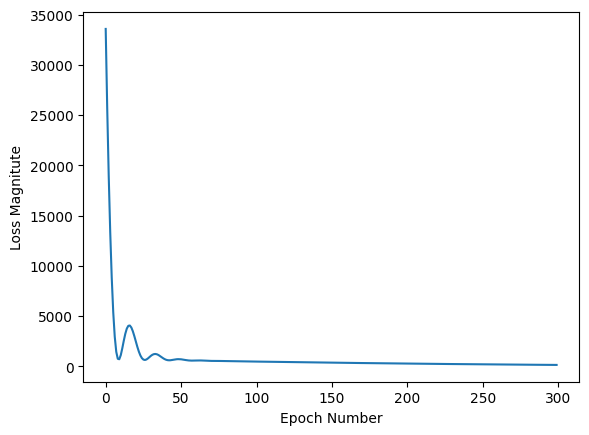

In [59]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitute')
plt.plot(history.history['loss'])

## ***STEP6: Use the model to predict values***

- Now you have a model that has been trained to learn the relationshop between celsius and fahrenheit.

- You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

 > For example, if the Celsius value is 100, what do you think the Fahrenheit result will be?


In [60]:
print(model.predict([100.0])) 
#The correct answer is 100 x 1.8 + 32 = 212, so our model is doing really well.

1/1 [==============================] - 0s 63ms/step
[[200.8802]]


#### **REVIEW**
- We created a model with a Dense layer
- We trained it with 3500 examples (7 pairs, over 500 epochs).

> Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was
not part of our training data.)



## ***STEP7: Looking at the layer weights***

Finally, let's print the internal variables of the Dense layer.

The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

In [61]:
print( "These are the layer variables: {}".format(layer1.get_weights()))

These are the layer variables: [array([[0.419541]], dtype=float32), array([0.], dtype=float32)]


This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line, $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### **A little experiment**

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [62]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(list1, list2, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 73ms/step
[[212.]]
1/1 [==============================] - 0s 38ms/step
Model predicts that 100 degrees Celsius is: [[212.]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.01108996,  0.05720715,  0.9223138 , -0.44970465]],
      dtype=float32), array([ 3.6009457,  2.8574197,  4.474016 , -4.4561434], dtype=float32)]
These are the l1 variables: [array([[-0.2787294 , -1.0166557 , -1.6287118 , -0.3596759 ],
       [-0.6947324 , -0.34355968, -1.1031983 , -0.19896437],
       [-0.770585  ,  0.09018141, -0.8212324 , -1.5381795 ],
       [ 0.8032466 ,  0.48061678,  0.9602346 ,  0.60110503]],
      dtype=float32), array([-1.5384643 ,  2.9526877 , -4.163796  , -0.82212996], dtype=float32)]
These are the l2 variables: [array([[-0.20849913],
       [ 0.33953747],
       [-1.341364  ],
       [ 0.0474614 ]], dtype=float32), array([2.9875534], dtype=float32)]
